# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

In [2]:
#Pandas show all column
pd.set_option('display.max_columns', 200)

#change params for matplotlib
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Data

In [3]:
df_raw = pd.read_csv('hotel_booking.csv')

In [4]:
df=df_raw.copy()

In [5]:
df.shape

(119390, 36)

# Explore data 

We have 119.390 rows data with 36 coloumns. Each coloumns definition were:

1. **hotel** : hotel type
2. **is_canceled** : customer cancellation status
3. **lead_time** : range between booking date and arrival date
4. **arrival_date_year** : year of arrival date
5. **arrival_date_month** : month of arrival date
6. **arrival_date_week_number** : week count of arrival date
7. **arrival_date_day_of_month** : day date of arrival date
8. **stays_in_weekend_nights** : total day stays on weekend
9. **stays_in_week_nights** : total day stays on weekday
10. **adults** : total of adults
11. **children** : total of children
12. **babies** : total of babies
13. **meal** : food services type (BB, HB, FB, SC, undefined)
14. **country** : country origin
15. **market_segment** : market segmentation B2B
16. **distribution_channel** : customer booking channel media
17. **is_repeated_guest** : repeated customer or not
18. **previous_cancellations** : total of booking cancellation before current booking
19. **previous_bookings_not_canceled** : total of booking not cancel before current booking
20. **reserved_room_type** : room type reserved
21. **assigned_room_type** : assigned room type upon arrival
22. **booking_changes** : total of booking detail changes before arrival
23. **deposit_type** : deposit type
24. **agent** : ID travel agent
25. **company** : ID company 
26. **days_in_waiting_list** : total days in waiting list
27. **customer_type** : customer type
28. **adr** : average daily rate
29. **required_car_parking_spaces** : total of requested parking lot
30. **total_of_special_requests** : total of special request
31. **reservation_status** : reservation status
32. **reservation_status_date** : latest update on reservation status
33. **name** : customer name
34. **email** : customer email
35. **phone-number** : customer phone number
36. **credit card** : customer credit card number

# Exploratory Data Analysis

## Descriptive Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

we can see that:
- Dataframe have a total of 119390 rowss and 36 coloumns
- there are null values present in some coloumns like : `children`, `country`, `agent`, `company`
- our targeted data are `is_canceled` with int data type
- the rest are numerical and object feature
- `children` should be an int64 
- `agent`,`company` should be an object

we can separate numerical and categorical(object) data type to each categories:

In [7]:
df['company']=df['company'].astype('object')

`agent` and `company` data type were changed to object for better analysis result later

In [8]:
cats=[i for i in df.columns if df[i].dtypes == 'object' and i not in (['name', 'email', 'phone-number', 'credit_card'])]
nums=[i for i in df.columns if df[i].dtypes != 'object' and i != 'is_canceled']

separating numerical and categorical coloumn were condacted to simplified our analysis process

### Data Sampling to indentify invalid values

In [9]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
38248,Resort Hotel,0,152,2017,July,27,4,2,7,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,F,F,0,No Deposit,NaN,NaN,0,Transient,151.00,0,2,Check-Out,2017-07-13,Matthew Fleming,Matthew_Fleming@att.com,322-683-5766,************2862
45070,City Hotel,0,102,2015,October,42,16,0,2,2,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,6.0,NaN,0,Transient-Party,109.00,0,0,Check-Out,2015-10-18,Richard Mcbride,Richard_M@zoho.com,296-615-9378,************8441
77561,City Hotel,0,0,2015,September,39,21,1,1,2,0.0,0,BB,ESP,Direct,Direct,0,0,0,A,A,1,No Deposit,NaN,NaN,0,Transient,152.00,0,0,Check-Out,2015-09-23,Timothy Bailey,TimothyBailey@verizon.com,255-764-8799,************3998
83624,City Hotel,0,9,2016,February,6,6,2,1,3,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,130.00,0,2,Check-Out,2016-02-09,Jeremy Davis,Davis_Jeremy@hotmail.com,956-920-5219,************4276
9403,Resort Hotel,1,16,2016,November,48,25,0,1,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,56.00,0,0,Canceled,2016-11-15,Juan Sharp,Juan.Sharp95@zoho.com,227-290-3251,************1823
111718,City Hotel,0,139,2017,May,19,13,1,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,135.00,0,0,Check-Out,2017-05-15,Lisa Olson,Lisa.Olson@xfinity.com,692-648-4564,************1041
111240,City Hotel,0,99,2017,May,18,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,1,Check-Out,2017-05-08,Kristopher Thomas,KThomas@yahoo.com,977-622-0686,************6977
85111,City Hotel,0,49,2016,March,11,9,0,1,1,0.0,0,BB,COL,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,7.0,NaN,0,Transient,67.22,0,1,Check-Out,2016-03-10,Vickie Mason,Vickie.Mason95@hotmail.com,180-182-0856,************3528
71409,City Hotel,1,282,2017,July,27,5,0,2,3,0.0,0,HB,ITA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,212.00,0,1,Canceled,2016-10-10,Gary Owens DVM,GaryDVM@outlook.com,397-603-8555,************9595
39711,Resort Hotel,0,215,2017,August,33,19,2,5,2,0.0,1,FB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,250.0,NaN,0,Transient-Party,184.54,0,2,Check-Out,2017-08-26,Brittany King,Brittany_K@hotmail.com,876-920-7905,************5633


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count kolom arrival_date_month:
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Value count kolom meal:
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Value count kolom country:
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
NCL        1
CYM        1
PYF        1
DMA        1
KIR        1
Name: country, Length: 177, dtype: int64

Value count kolom market_segment:
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, d

there were no invalid values found up to this point in our dataframe

## Statistical summary

In [12]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
is_repeated_guest,119390.0,0.031912,0.175767,0.00,0.00,0.000,0.0,1.0


from *statistical summary* result, we can conclude :
- `lead time` were indicated positively skewed because mean > median
- `adr` were incdicated positively skewe and have an invalid values (there's no way avarage daily rate can be negative)


### Categorical approach

In [13]:
df[cats].describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
company,6797.0,352.0,40.0,927.0


there were missing value present in `agent`, `company`

## Univariate Analysis

### Boxplot 

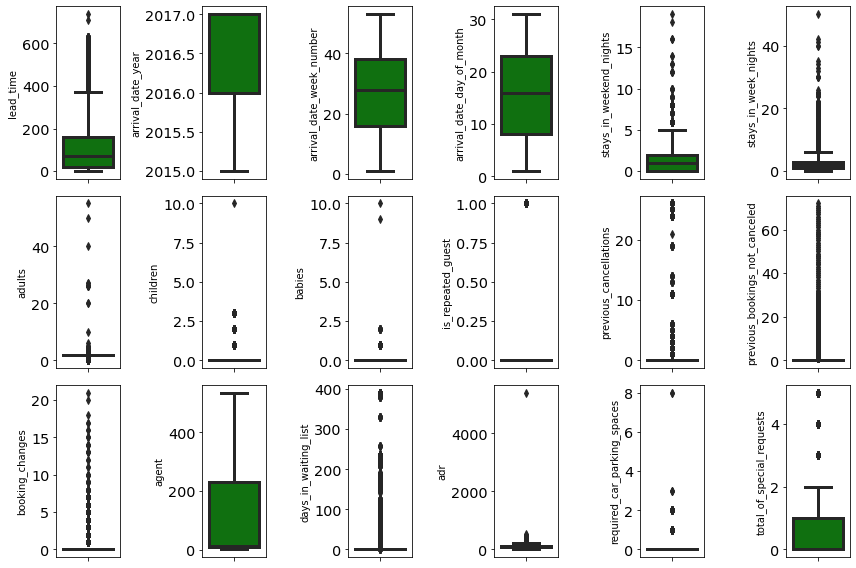

In [14]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Based on the visualization above:
- Most of our data have an outlier except `arrival_date_year`, `arrival_date_week_number` dan `arrival_date_day_of_month`
- all the data that have an outlier were indicated positively skewed

### Histplot

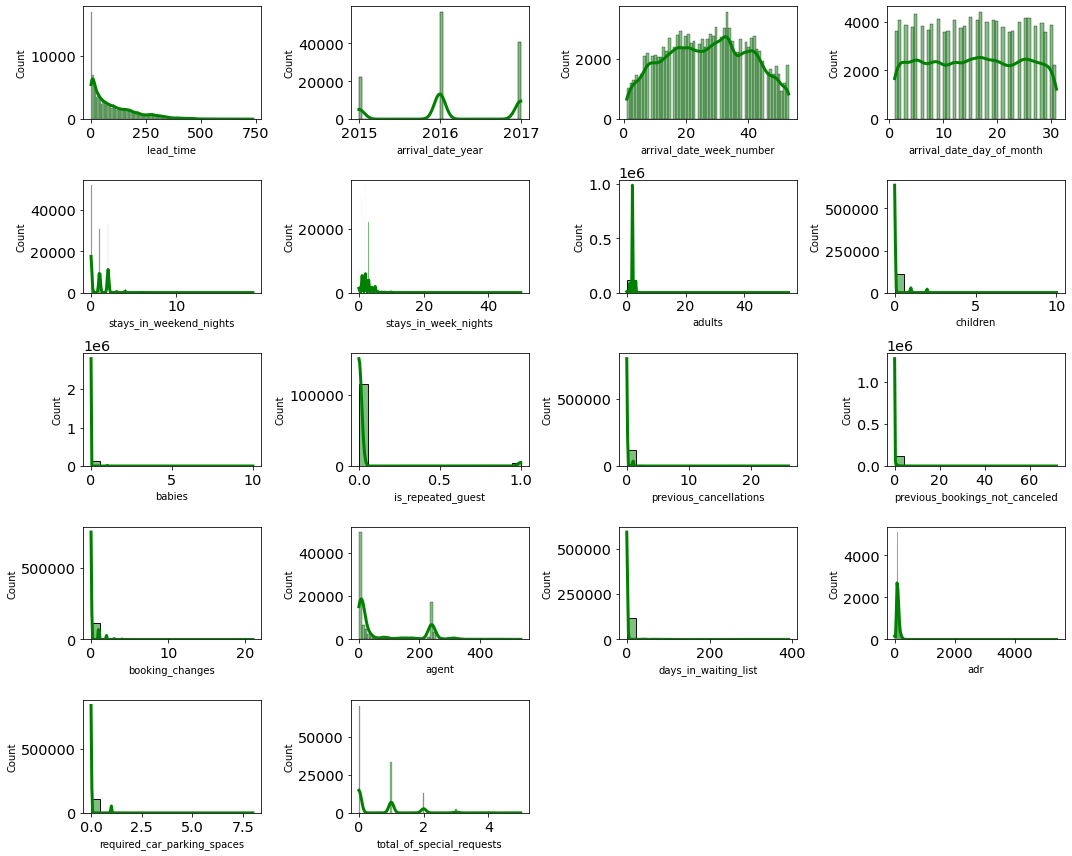

In [15]:
plt.figure(figsize=(15, 12))
for i in range(0, len(nums)):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True)
    plt.tight_layout()

based on the visualization above :
- most of our data were positively skewed 

### Countplot (categorical)

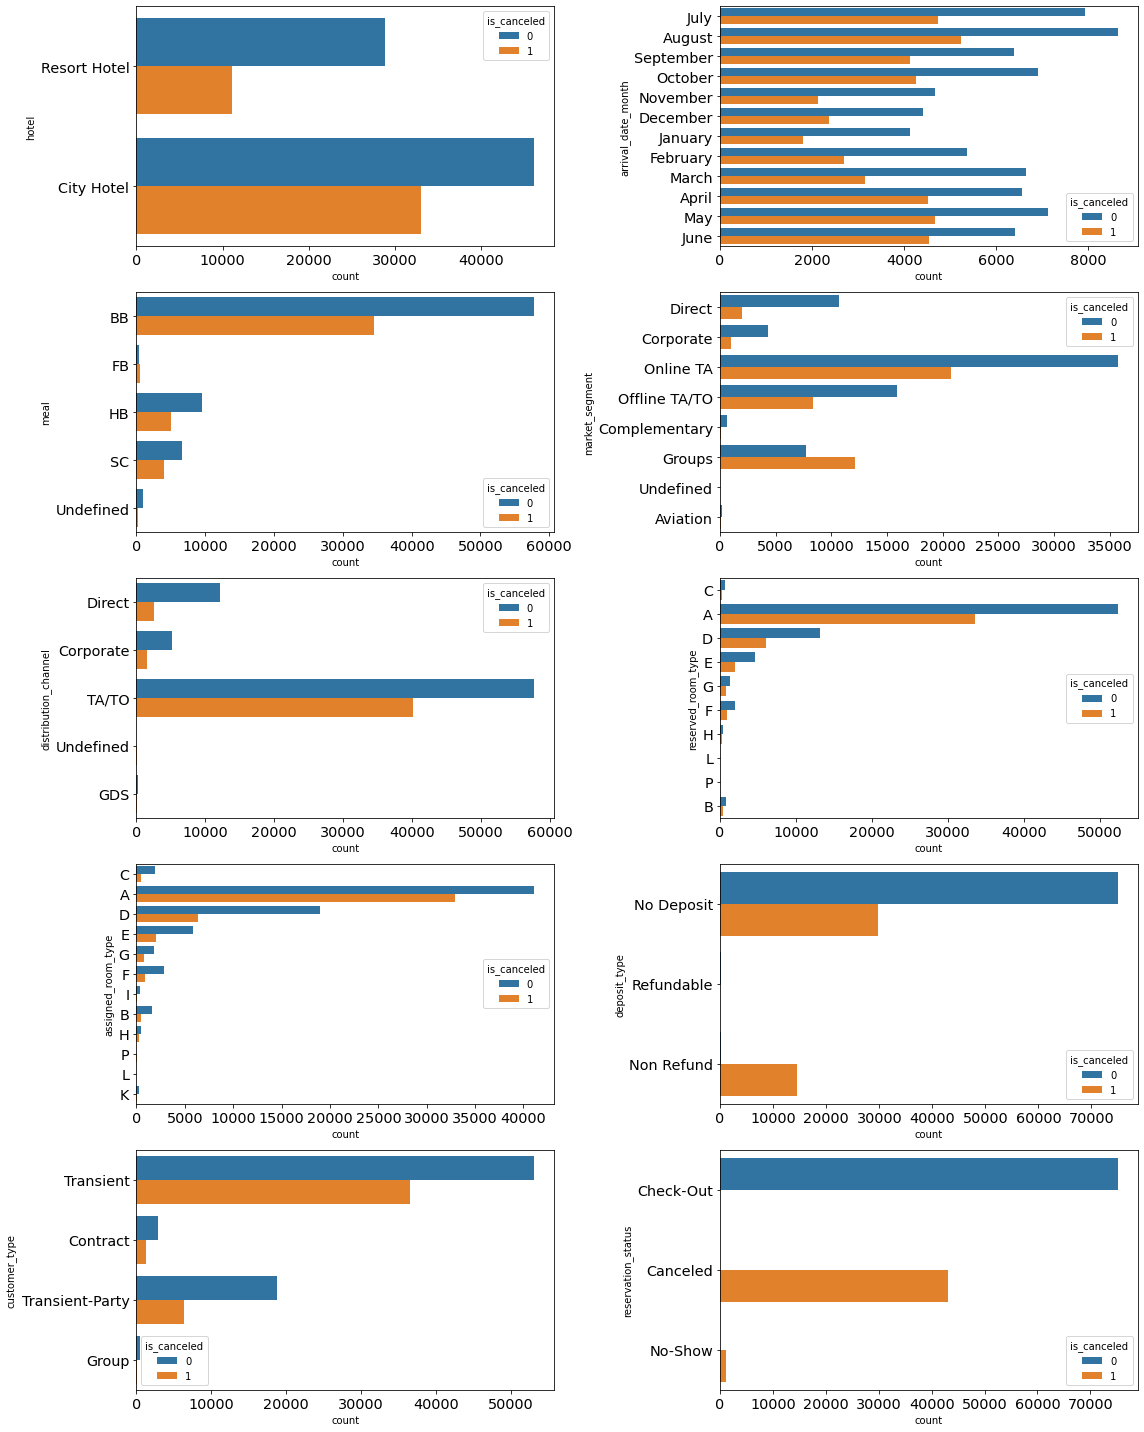

In [16]:
list_cats = [i for i in cats if i not in (['country', 'agent', 'company', 'reservation_status_date'])]
plt.figure(figsize=(16, 20))
for i in range(0, len(list_cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(y = df[list_cats[i]], orient='v', hue=df['is_canceled'])
    plt.tight_layout()

Based on the visualization above :
- highest booking happened on August
- higest booking hotel type are city hotel
- Bed and Breakfast were the most chosen meal choices
- Online Travel Agent were the most market used
- the most Reserved dan Assigned room type were type A room, there weren't any reserved for room type I dan K meand these 2 room type were less desireable for our customer
- Most of our customer were not choosing deposit payment
- Most of our customer were Transient (short-term stays)


<AxesSubplot:xlabel='company', ylabel='email'>

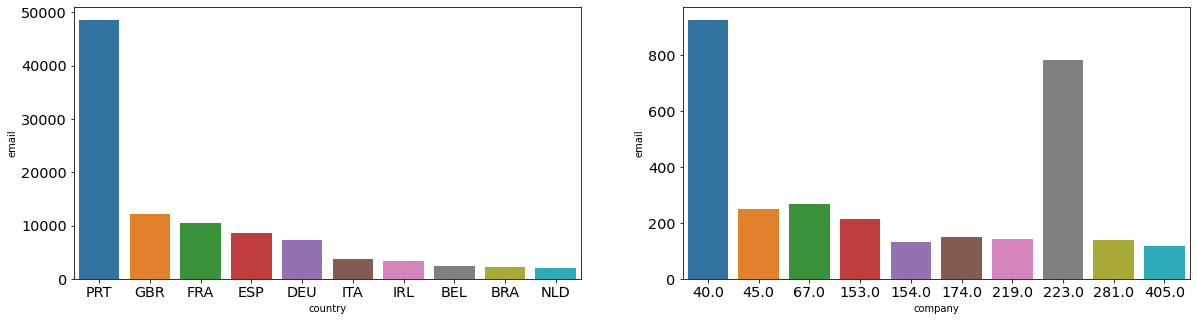

In [17]:
df_country = df.groupby(['country'])[['email']].count().reset_index().sort_values('email', ascending = False).head(10)
df_company = df.groupby(['company'])[['email']].count().reset_index().sort_values('email', ascending = False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(x = 'country', y = 'email', data = df_country, ax = axes[0])
sns.barplot(x = 'company', y = 'email', data = df_company, ax = axes[1])

## Multivariate Analysis

### Correlation heatmap

<AxesSubplot:>

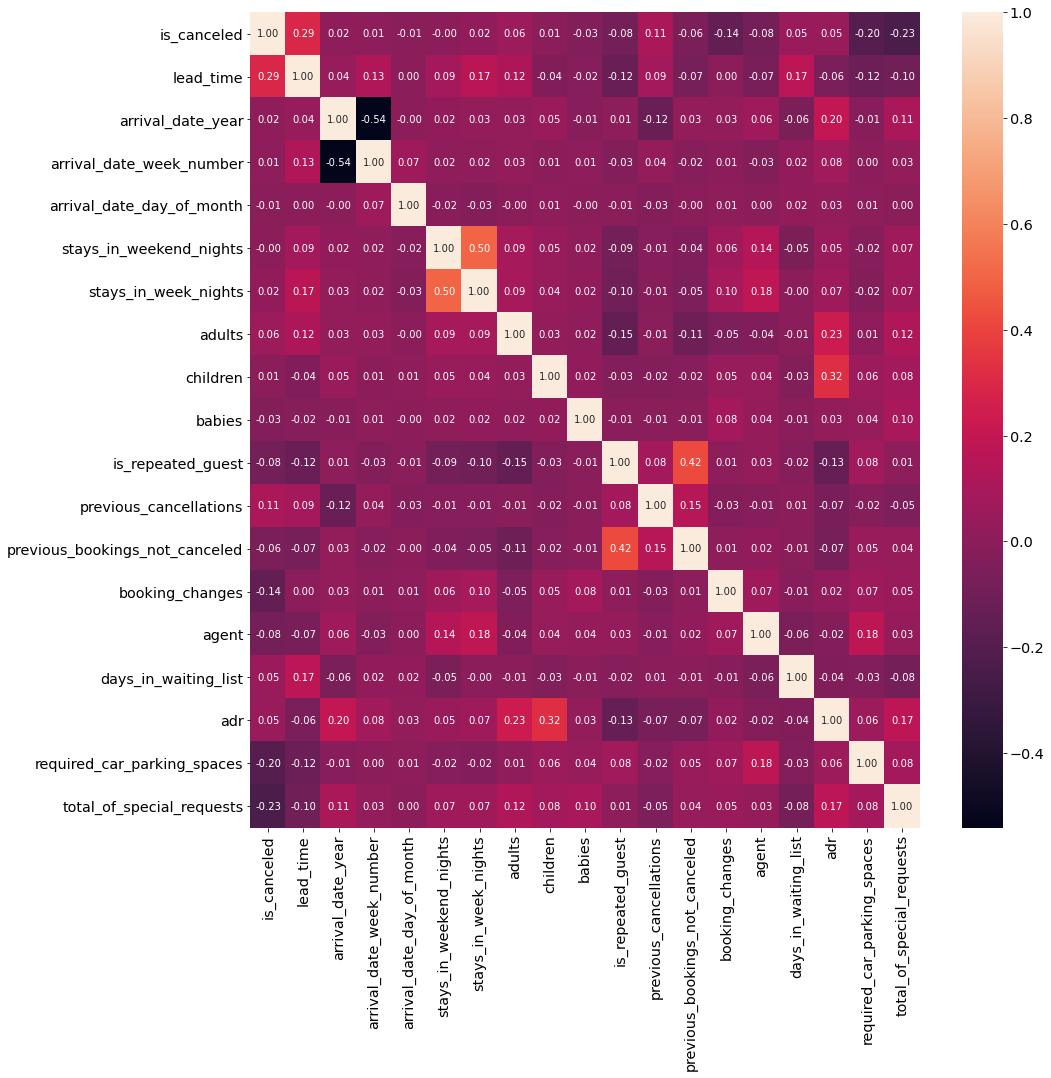

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

From the visualization above:
- `lead_time`, `total_of_special_request`, `required_car_parking_spaces` and `booking_changes` have the highest correlation to our target `is_canceled`
- `is_repeated_guest` and `previous_bookings_not_canceled` have a correlation
- `adr` with `children` and `adults` have a high correlation which mean when the total of `adult` and `children` were high so is `adr`
- `adr` and `arrival_date_year` have a moderate correlation and have a casuality in which the rate of service were likely increase annually

### Category Plot

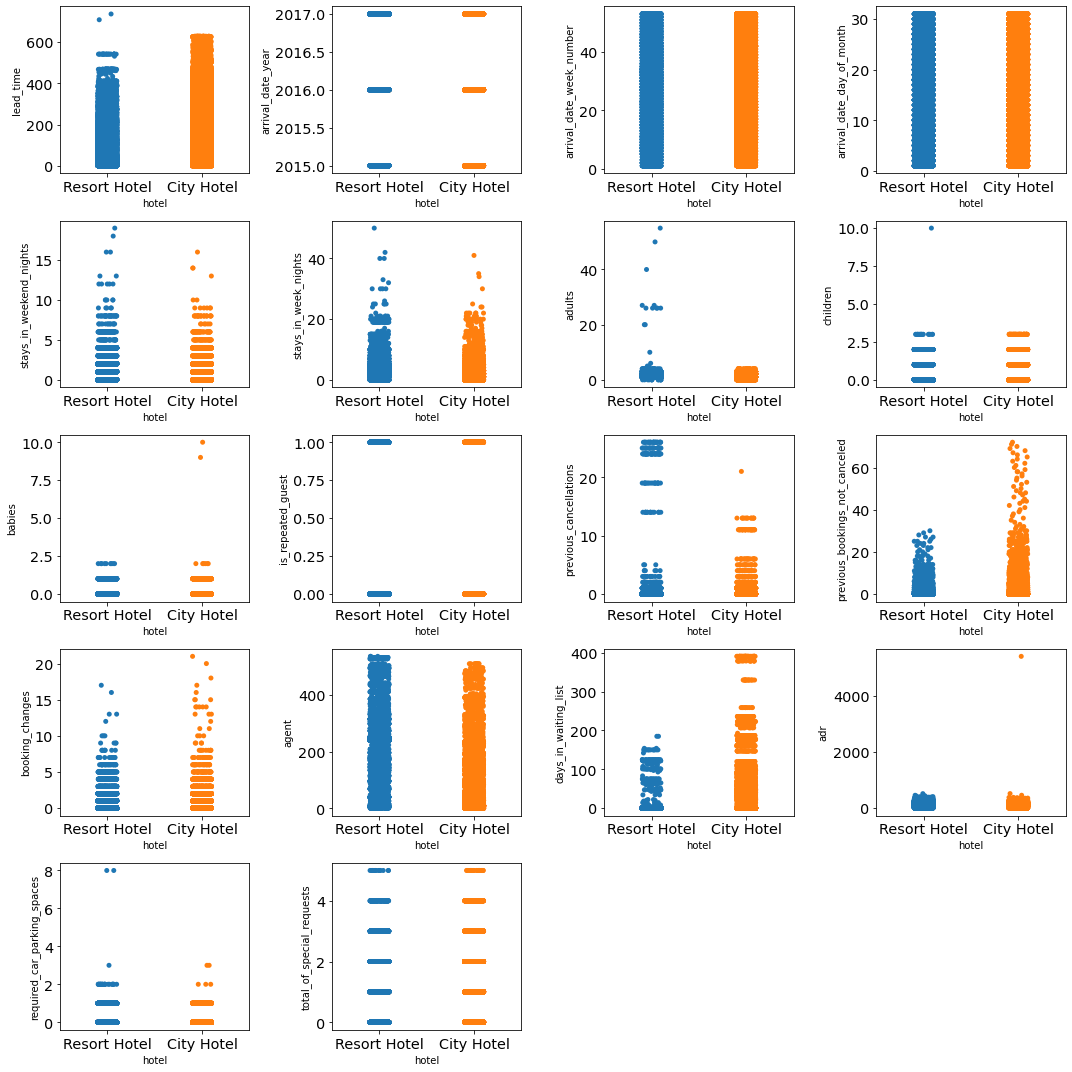

In [19]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(5, 4, i+1)
    sns.stripplot(ax=ax, data=df, x='hotel', y=nums[i])
    plt.tight_layout()
    if i != 0: plt.close(i+1)
    plt.close(len(nums) + 1)

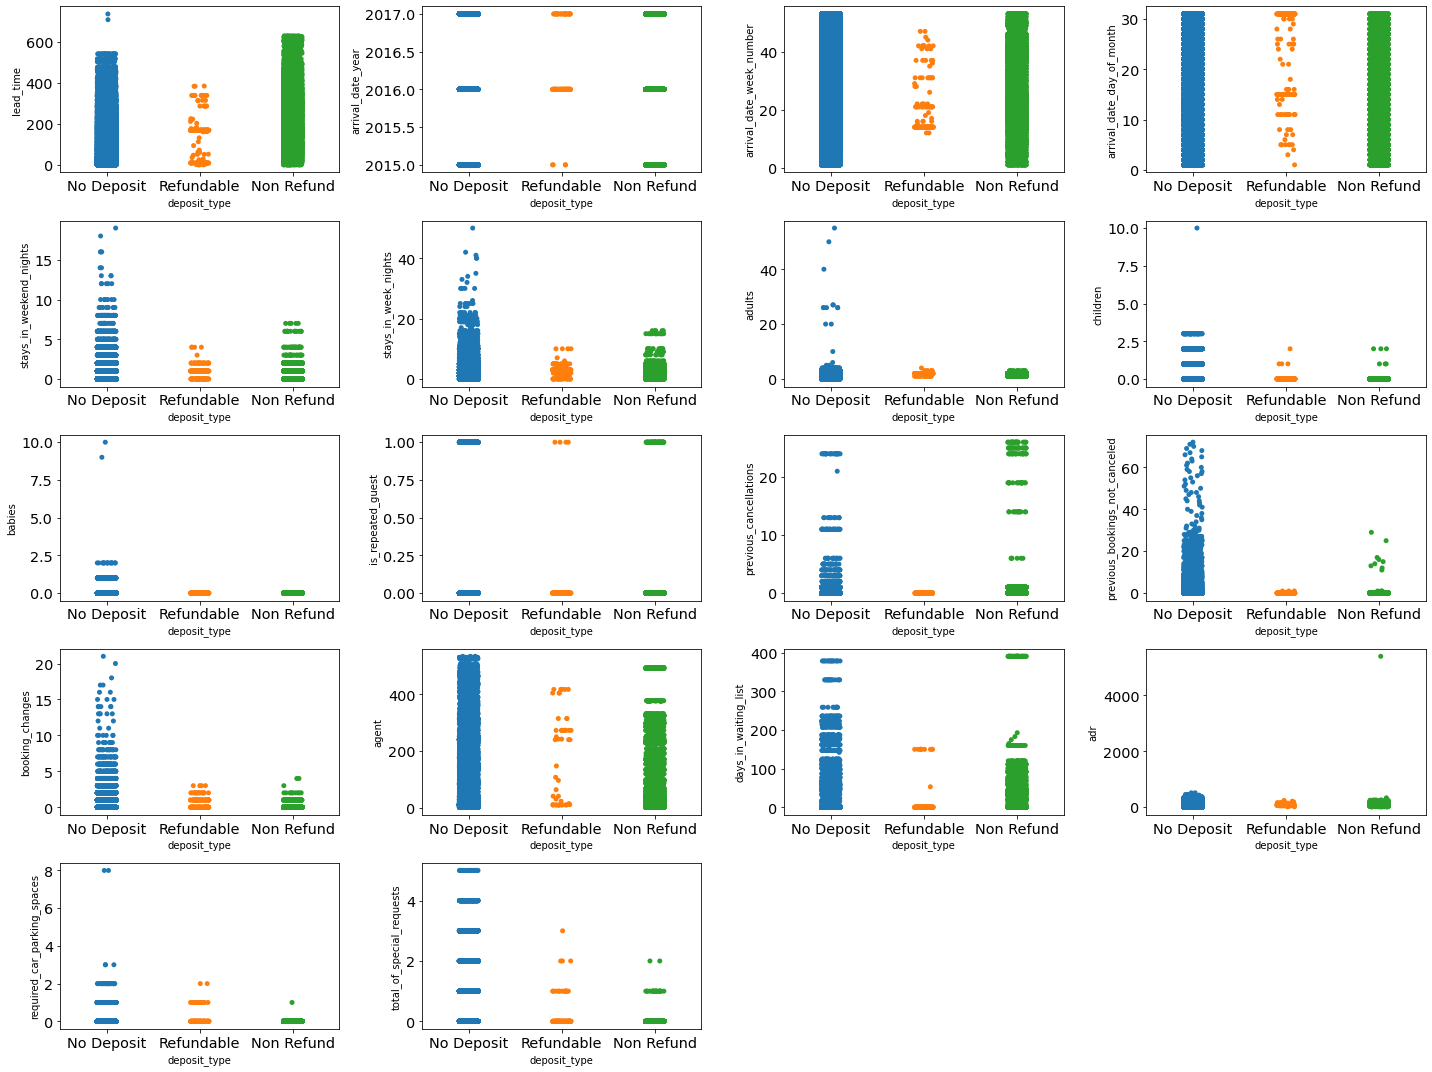

In [20]:
fig = plt.figure(figsize=(20, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(5, 4, i+1)
    sns.stripplot(ax=ax, data=df, x='deposit_type', y=nums[i])
    plt.tight_layout()
    if i != 0: plt.close(i+1)
    plt.close(len(nums) + 1)
    plt.tight_layout()

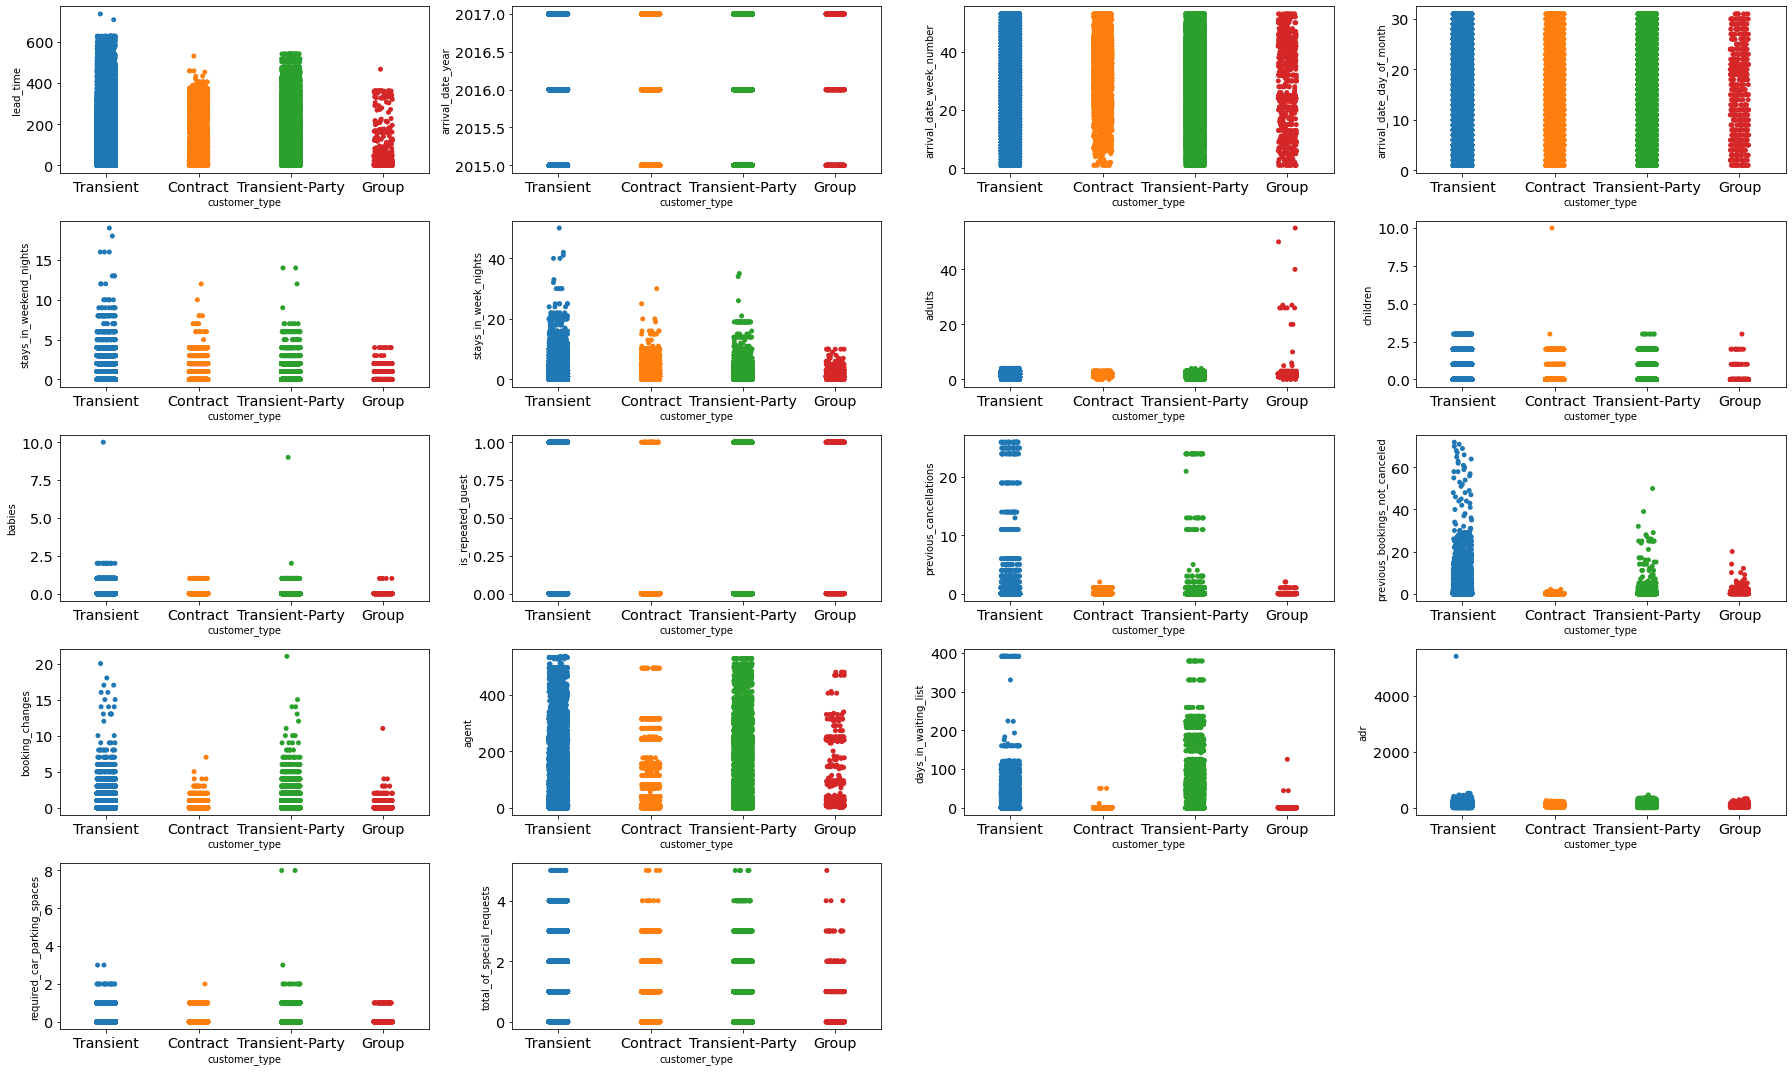

In [21]:
fig = plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(5, 4, i+1)
    sns.stripplot(ax=ax, data=df, x='customer_type', y=nums[i])
    plt.tight_layout()
    if i != 0: plt.close(i+1)
    plt.close(len(nums) + 1)
    plt.tight_layout()

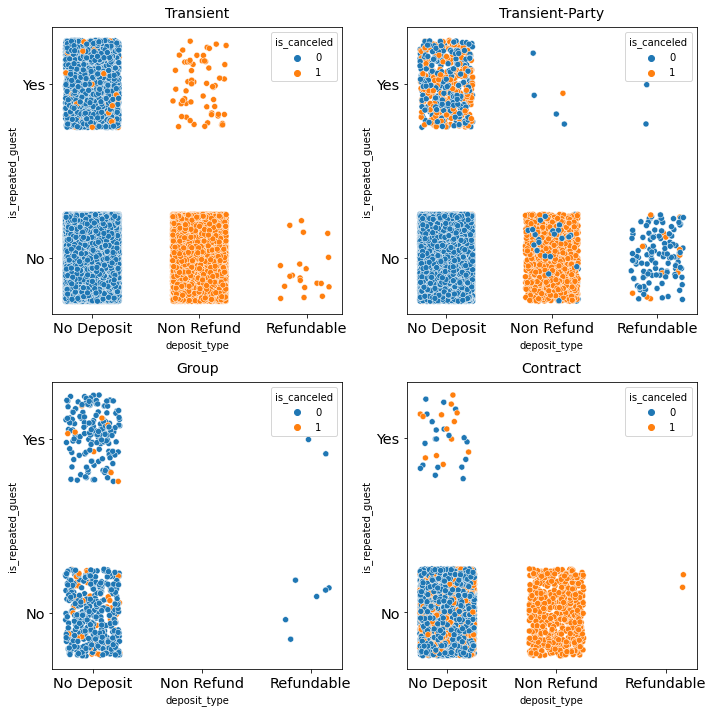

In [22]:
import warnings
warnings.filterwarnings("ignore")

list_df = ['Transient', 'Transient-Party', 'Group', 'Contract']

plt.figure(figsize = (10,10))
for index, i in enumerate(list_df):
    df_temp = df[df.customer_type == i]
    df_temp['deposit_type'] = np.where(df_temp['deposit_type'] == 'No Deposit', 0,
                                       np.where(df_temp['deposit_type'] == 'Non Refund', 1, 2))
    xnoise, ynoise = np.random.random(len(df_temp))/2, np.random.random(len(df_temp))/2
    plt.subplot(2, 2, index+1)
    plt.title(f'{i}', fontsize=14, pad=10)
    sns.scatterplot(x = df_temp['deposit_type'] + xnoise, y = df_temp['is_repeated_guest'] + ynoise, data = df_temp, hue = 'is_canceled')
    plt.yticks([0.25,1.25], labels = ['No', 'Yes'])
    plt.xticks([0.25,1.25,2.25], labels = ['No Deposit', 'Non Refund', 'Refundable'])
    plt.tight_layout() 
    plt.savefig('Customer Type')

# Data Preparation

### Missing Value

In [23]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Handling `children`**

for `children` null values we consider it as 0

In [24]:
df['children'] = df.apply(lambda x: 0 if np.isnan(x['children']) else x['children'], axis = 1)

**Handling `country`**

we will drop 488 null values in `country` because we can't consider anything for this

In [25]:
df.dropna(subset=['country'], inplace = True)

**Handling `Agent`**

there were 16.340 null values in `agent` which is 13,6% from our total rows so we can still drop it

In [26]:
df.dropna(subset=['agent'], inplace = True)

**Handling `Company`**

there were 94% null values in `company` which is rather high, so we will drop the whole coloumn

In [27]:
df.drop(['company'], axis = 1, inplace = True)

In [28]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

data count after handling missing values

In [29]:
len(df)

102896

### Invalid Values

In [30]:
# we'll check any invalid values in dataset, is there happened to be data in `adult`,`children` dan `babies' with 0 values at the same row

df[(df['adults']==0)&(df['children']==0)&(df['babies']==0)].shape[0]

120

There were **120** invalid data in our dataset needs to be handled

In [31]:
df=df[~((df['adults']==0)&(df['children']==0)&(df['babies']==0))]
df.shape

(102776, 35)

In [32]:
df[(df['adults']==0)&(df['children']==0)&(df['babies']==0)].shape[0]

0

#### drop negative values in `adr`

In [33]:
df = df[~(df.adr < 0)]

In [34]:
df[(df.adr < 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


### Duplicate Data

In [35]:
df.duplicated().sum()

0

In [36]:
df.duplicated(subset=['name', 'email', 'reservation_status_date']).sum()

0

**there were no duplicated data present in our dataset**


### Invalid Data type

In [37]:
df.agent = df.agent.astype('int64')

In [38]:
df.agent = df.agent.astype('object')

In [39]:
df_clean = df.copy()

### Feature Engineering

In [40]:
from datetime import datetime as dt

def feature_engineering(df_fe):
    df_fe['total_people'] = df_fe['adults'] + df_fe['babies'] + df_fe['children']
    df_fe['total_stays_night'] = df_fe['stays_in_weekend_nights']+df_fe['stays_in_week_nights']
    df_fe['last_name'] = df_fe['name'].apply(lambda x: str(x).split()[1])
    df_fe['prefix_phone_number'] = df_fe['phone-number'].apply(lambda x: x[0:3])
    df_fe['arrival_date'] = df_fe.apply(lambda x: dt.strptime(str(x['arrival_date_day_of_month'])+' '+str(x['arrival_date_month'])+' '+str(x['arrival_date_year']), '%d %B %Y'), axis = 1)
    df_fe['reservation_status_date'] = df_fe['reservation_status_date'].apply(lambda x: dt.strptime(x, '%Y-%m-%d'))
    df_fe['cancellation_time'] = df_fe.apply(lambda x: -1 if x['reservation_status'] == 'Check-Out' else (x['arrival_date'] - x['reservation_status_date']).days, axis = 1)
    df_fe['email_type'] = df_fe.apply(lambda x: str(x['email']).split('@')[1].split('.')[0], axis = 1)
    df_fe['was_in_waiting_list'] = df_fe.apply(lambda x: 1 if x['days_in_waiting_list'] > 0 else 0, axis = 1)
    return df_fe

## Baseline

### Feature Selection

In [41]:
df_bl = df_clean.copy()

df_bl = df_bl[['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']]

In [42]:
df_bl.shape

(102775, 29)

### Feature Encoding

In [43]:
categorical_features = df_bl.loc[:, df_bl.columns != 'is_canceled'].select_dtypes(['object']).columns.to_list()
categorical_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'customer_type']

In [44]:
df_encode_bl = df_bl.copy()

for cat in categorical_features:
    onehots = pd.get_dummies(df_encode_bl[cat], prefix=cat)
    df_encode_bl = df_encode_bl.join(onehots)

df_encode_bl.drop(categorical_features, axis = 1, inplace = True)

## Scenario 0

### Feature Engineering

In [45]:
#Data Scenario 0

df_clean_fe = df_clean.copy()
df_clean_fe['reservation_status_date']=df_clean_fe['reservation_status_date'].astype('str')
df_clean_fe = feature_engineering(df_clean_fe)

In [46]:
df_clean_fe.arrival_date.sort_values()

3        2015-07-01
75551    2015-07-01
75552    2015-07-01
75553    2015-07-01
75554    2015-07-01
            ...    
73713    2017-08-31
40007    2017-08-31
119281   2017-08-31
39953    2017-08-31
73712    2017-08-31
Name: arrival_date, Length: 102775, dtype: datetime64[ns]

### Feature Selection

In [47]:
df_clean_fs = df_clean_fe.copy()

df_clean_fs = df_clean_fs[['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'total_people', 'total_stays_night',
       'last_name', 'prefix_phone_number',
       'email_type', 'was_in_waiting_list']]

### Feature Encoding

In [48]:
cats = [i for i in df_clean_fs.columns if (df_clean_fs[i].dtypes == 'O')] 

df_encode_0 = df_clean_fs.copy()

for cat in cats:
    onehots = pd.get_dummies(df_encode_0[cat], prefix=cat)
    df_encode_0 = df_encode_0.join(onehots)

df_encode_0 = df_encode_0.drop(cats, axis = 1)

## Scenario 1

### Outliers

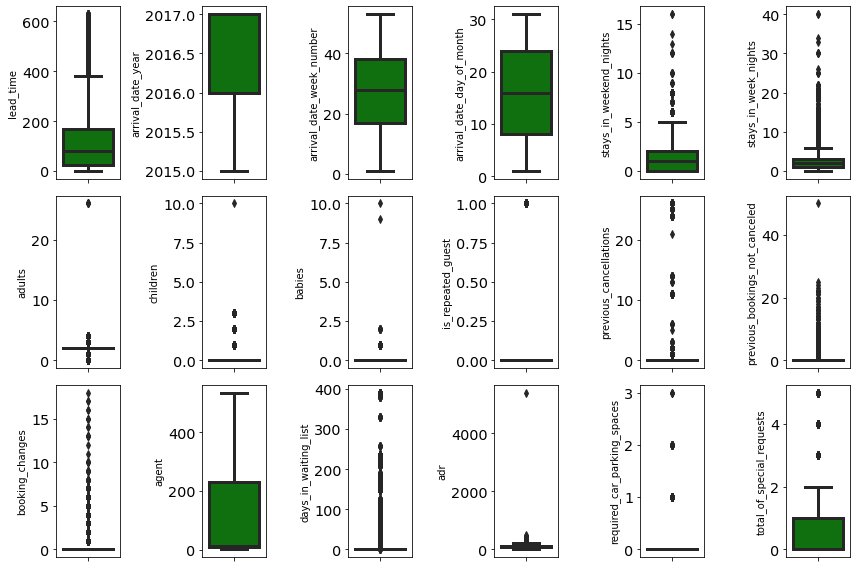

In [49]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

### Trimming outlier in previous_bookings_not_canceled

Drop 1 row data outlier (50)

In [50]:
df = df[~(df.previous_bookings_not_canceled > 40)]

### Log Transformation

The transformation preserves zero: a value that is 0 in the original scale is also 0 in the transformed scale. The function acts like the log (base 10) function when x > 0. Notice that L(10) ≈ 1, L(100) ≈ 2, and L(1000) ≈ 3. This property makes it easy to interpret values of the transformed data in terms of the scale of the original data. Negative values are transformed similarly.

In [51]:
feature_log = ['children', 'babies', 'required_car_parking_spaces', 'adults', 'stays_in_weekend_nights', 'stays_in_week_nights', 
               'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'total_of_special_requests']

for i in feature_log:
    df[i] = df[i].apply(lambda x: np.log(x) if x != 0 else 0)

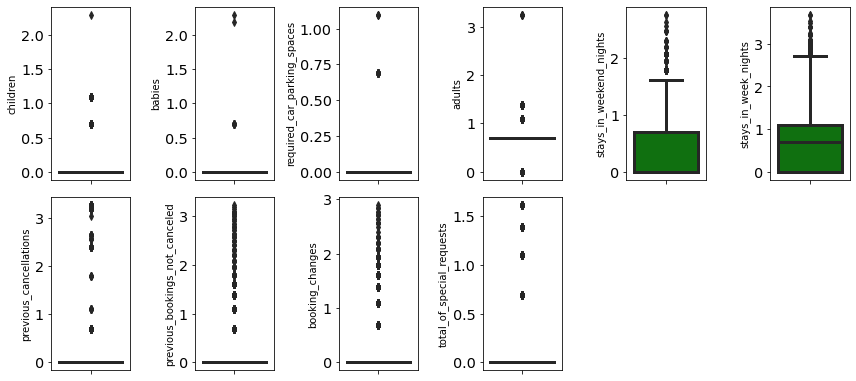

In [52]:
plt.figure(figsize=(12,8))
for i in range(0, len(feature_log)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df[feature_log[i]], color='green', orient='v')
    plt.tight_layout()

### Z-Score

In [93]:
df_zscore=df.copy()

In [94]:
from scipy import stats

print(f'total rows before filtering outlier: {len(df_zscore)}')

filtered_entries = np.array([True] * len(df_zscore))

for col in ['lead_time', 'days_in_waiting_list', 'adr']:
    zscore = abs(stats.zscore(df_zscore[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df_zscore = df_zscore[filtered_entries]

print(f'total rows after filtering outlier: {len(df_zscore)}')

df_zscore = df_zscore.reset_index(drop = True)

total rows before filtering outlier: 102774
total rows after filtering outlier: 98963


**Data after handling outlier**

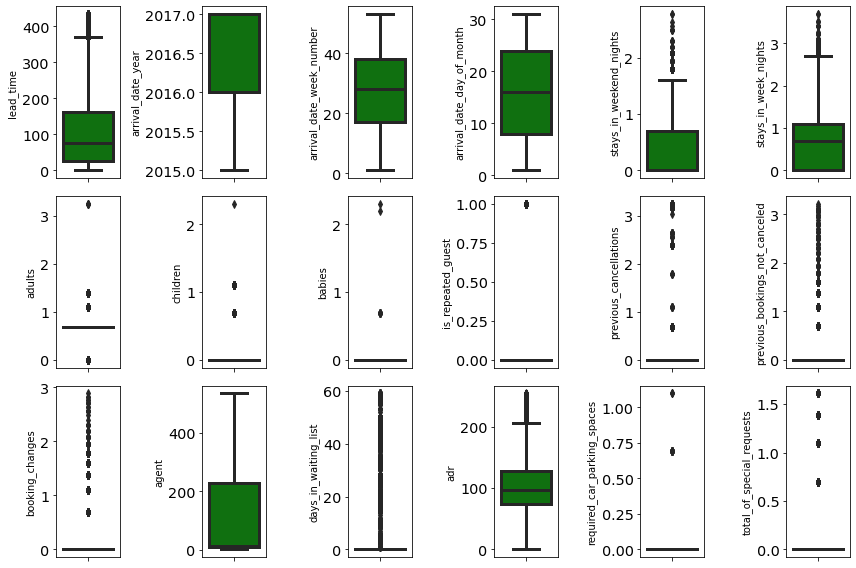

In [55]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df_zscore[nums[i]], color='green', orient='v')
    plt.tight_layout()

In [56]:
#Data Scenario 1

df_fe = df_zscore.copy()
df_fe = feature_engineering(df_fe)

### TimeSeries Plot

In [57]:
df_time_series = df_fe.copy()
df_time_series['arrival_date_month'] = df_time_series.apply(lambda x: dt.strptime(str(x['arrival_date_month'])+' '+str(x['arrival_date_year']), '%B %Y'), axis = 1)

Text(0, 0.5, 'Days')

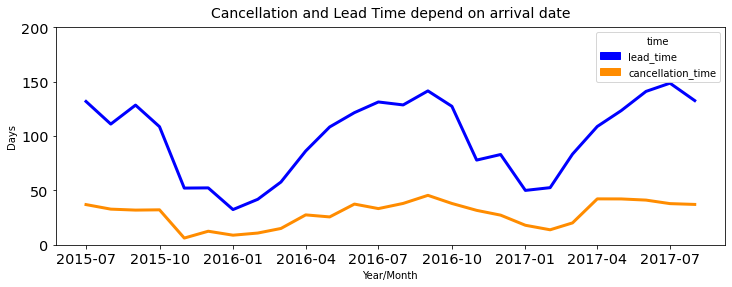

In [58]:
df_lead_time = df_time_series.groupby(['arrival_date_month'])[['lead_time']].mean().reset_index().sort_values('arrival_date_month')
df_cancellation_time = df_time_series.groupby(['arrival_date_month'])[['cancellation_time']].mean().reset_index().sort_values('arrival_date_month')

sns.lineplot(x = 'arrival_date_month', y = 'lead_time', data = df_lead_time, lw = 3, color = 'blue')
sns.lineplot(x = 'arrival_date_month', y = 'cancellation_time', data = df_cancellation_time, lw = 3, color = 'darkorange')
plt.ylim(0, 200)
colors = {'lead_time':'blue', 'cancellation_time':'darkorange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='time')
plt.title('Cancellation and Lead Time depend on arrival date', fontsize = 14, pad = 10)
plt.xlabel('Year/Month')
plt.ylabel('Days')

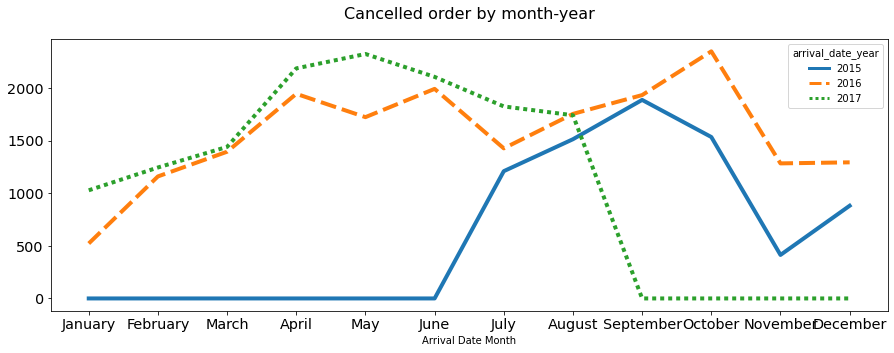

In [59]:
canceled = df[df['is_canceled'] == 1]
canceled_by_month_year = canceled.pivot_table(index='arrival_date_year', columns='arrival_date_month', aggfunc='count').fillna(0).adr.T

import calendar
canceled_by_month_year = canceled_by_month_year.reindex(calendar.month_name[1:])
plt.figure(figsize=(15, 5))
plt.xlabel('Arrival Date Month')
plt.title('Cancelled order by month-year', fontsize = 16, pad = 20)
sns.lineplot(data=canceled_by_month_year, linewidth=4)
plt.show()

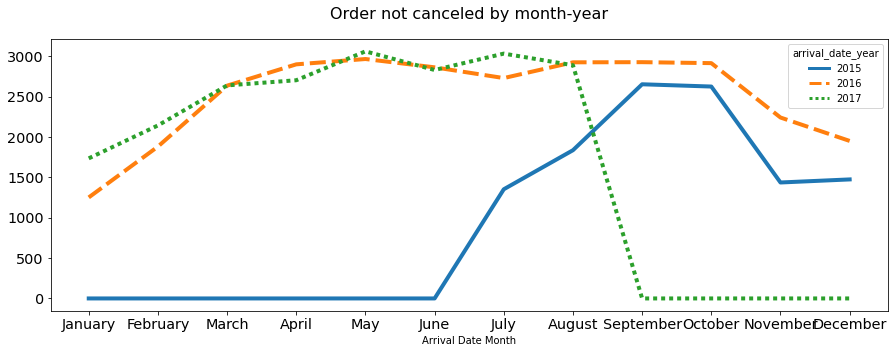

In [60]:
not_canceled = df[df['is_canceled'] == 0]
not_canceled_by_month_year = not_canceled.pivot_table(index='arrival_date_year', columns='arrival_date_month', aggfunc='count').fillna(0).adr.T

import calendar
not_canceled_by_month_year = not_canceled_by_month_year.reindex(calendar.month_name[1:])
plt.figure(figsize=(15, 5))
plt.xlabel('Arrival Date Month')
plt.title('Order not canceled by month-year', fontsize = 16, pad = 20)
sns.lineplot(data=not_canceled_by_month_year, linewidth=4)
plt.show()

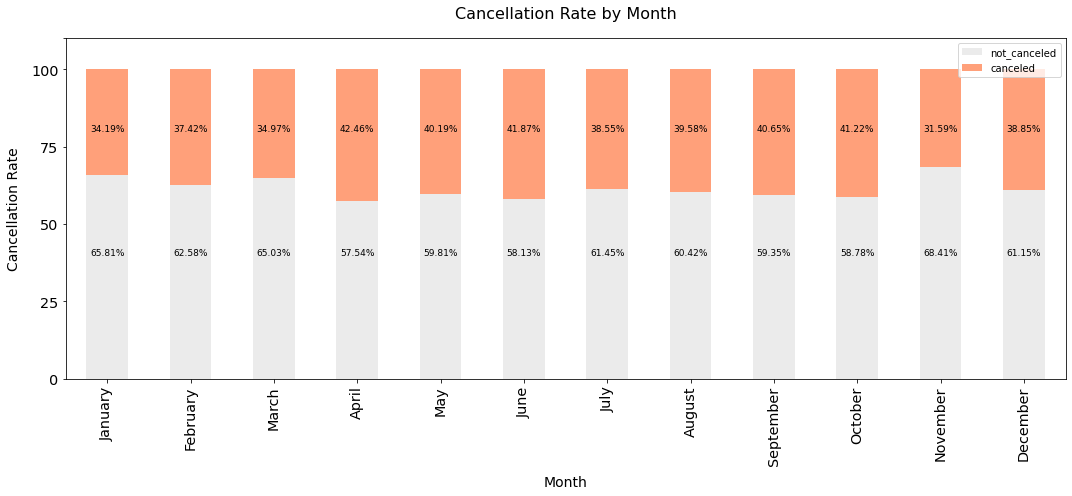

In [61]:
import calendar
order_percentage = df.pivot_table(index='is_canceled', columns='arrival_date_month', aggfunc='count').adr.apply(lambda x: round(x/(x.sum())*100, 2)).T.reindex(calendar.month_name[1:]).reset_index()
order_percentage.columns = ['month', 'not_canceled', 'canceled']
order_percentage

fig, axes = plt.subplots(1,1)
order_percentage.plot(x = 'month', kind = 'bar', stacked = True, figsize=(15,7), color=['#ebebeb','lightsalmon'], ax = axes)
axes.set_title('Cancellation Rate by Month', fontsize = 16, pad = 20)
axes.set_ylabel('Cancellation Rate', fontsize = 14, labelpad = 10)
axes.set_xlabel('Month', fontsize = 14, labelpad = 10)
axes.set_yticks([0, 25, 50, 75, 100, 110])
axes.set_yticklabels(['0', '25', '50', '75', '100', ' '])

#add data point not_canceled
x = order_percentage['month']
y = order_percentage['not_canceled']
x_numbers = range(len(x))
for i in x_numbers:
    axes.text(x = x_numbers[i], y = 40, s = str(y[i])+'%', size = 9, ha='center')
    
# #add data point canceled
x = order_percentage['month']
y = order_percentage['canceled']
x_numbers = range(len(x))
for i in x_numbers:
    axes.text(x = x_numbers[i], y = 80, s = str(y[i])+'%', size = 9, ha='center')
plt.tight_layout()
plt.savefig('Cancellation_rate_month.jpg')

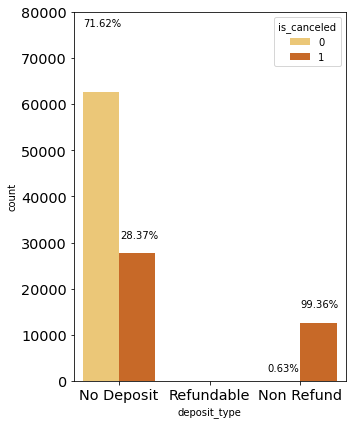

In [62]:
plt.figure(figsize = (5, 6))
sns.countplot(x = 'deposit_type', hue = 'is_canceled', data = df, palette = 'YlOrBr')
plt.ylim((0, 80000))

plt.text(-0.4, 77000, s = '71.62%')
plt.text(0.01, 31000, s = '28.37%')

plt.text(1.64, 2000, s = '0.63%')
plt.text(2, 16000, s = '99.36%')

plt.tight_layout()
plt.savefig('deposit_type.jpg')

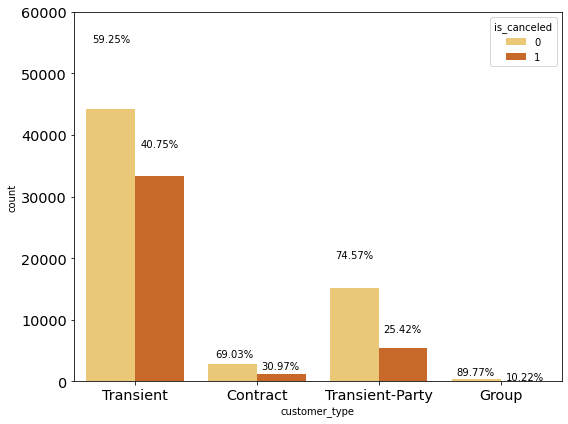

In [63]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'customer_type', hue = 'is_canceled', data = df, palette = 'YlOrBr')

plt.ylim(0, 60000)
plt.text(-0.35, 55000, s = '59.25%')
plt.text(0.05, 38000, s = '40.75%')

plt.text(0.66, 4000, s = '69.03%')
plt.text(1.04, 2000, s = '30.97%')

plt.text(1.64, 20000, s = '74.57%')
plt.text(2.04, 8000, s = '25.42%')

plt.text(2.64, 1000, s = '89.77%')
plt.text(3.04, 200, s = '10.22%')

plt.tight_layout()


plt.savefig('customer_type.jpg')

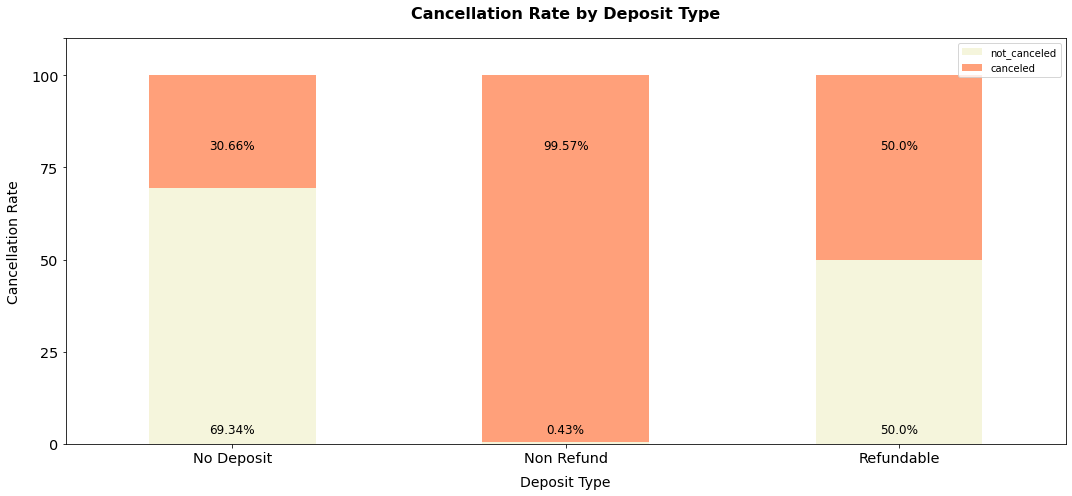

In [64]:
deposit_cancel_rate = df.pivot_table(index='is_canceled', columns='deposit_type', aggfunc='count').adr.apply(lambda x: round(x/(x.sum())*100, 2)).T.fillna(0).reset_index()
deposit_cancel_rate.columns = ['deposit_type', 'not_canceled', 'canceled']
deposit_cancel_rate

fig, axes = plt.subplots(1,1)
deposit_cancel_rate.plot(x = 'deposit_type', kind = 'bar', stacked = True, figsize=(15,7), color=['beige','lightsalmon'], ax = axes)
axes.set_title('Cancellation Rate by Deposit Type', fontsize = 16, pad = 20,weight='bold')
axes.set_ylabel('Cancellation Rate', fontsize = 14, labelpad = 10)
axes.set_xlabel('Deposit Type', fontsize = 14, labelpad = 10)
axes.set_yticks([0, 25, 50, 75, 100, 110])
axes.set_yticklabels(['0', '25', '50', '75', '100', ' '])
plt.xticks(rotation = 0)

#add data point not_canceled
x = deposit_cancel_rate['deposit_type']
y = deposit_cancel_rate['not_canceled']
x_numbers = range(len(x))
for i in x_numbers:
    axes.text(x = x_numbers[i], y = 3, s = str(y[i])+'%', size = 12, ha='center')
    
# #add data point canceled
x = deposit_cancel_rate['deposit_type']
y = deposit_cancel_rate['canceled']
x_numbers = range(len(x))
for i in x_numbers:
    axes.text(x = x_numbers[i], y = 80, s = str(y[i])+'%', size = 12, ha='center')

plt.tight_layout()
plt.savefig('deposit_type_2.jpg')

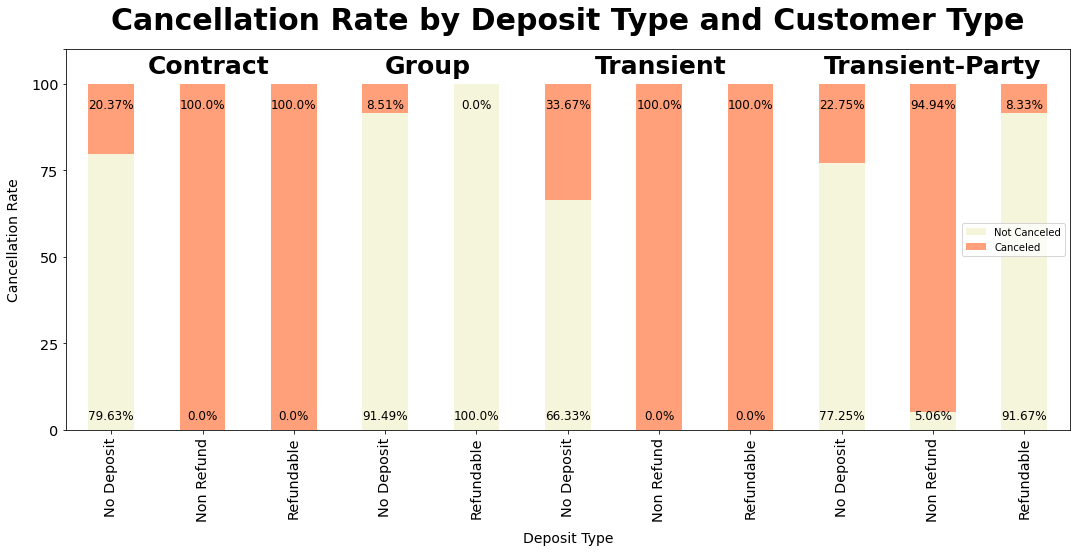

In [65]:
dep_custype_cancel_rate = df.pivot_table(index='is_canceled', columns=['customer_type','deposit_type'], aggfunc='count').adr.apply(lambda x: round(x/(x.sum())*100, 2)).T.fillna(0).reset_index()
dep_custype_cancel_rate.columns = ['customer_type','deposit_type', 'not_canceled', 'canceled']
dep_custype_cancel_rate

fig, axes = plt.subplots(1,1)
dep_custype_cancel_rate.plot(x = 'deposit_type', kind = 'bar', stacked = True, figsize=(18,7), color=['beige','lightsalmon'], ax = axes)
axes.set_title('Cancellation Rate by Deposit Type and Customer Type', fontsize = 30, pad = 20,weight='bold')
axes.set_ylabel('Cancellation Rate', fontsize = 14, labelpad = 10)
axes.set_xlabel('Deposit Type', fontsize = 14, labelpad = 10)
axes.set_yticks([0, 25, 50, 75, 100, 110])
axes.set_yticklabels(['0', '25', '50', '75', '100', ' '])
axes.text(x = 0.4, y = 103, s = 'Contract', size = 25, weight = 'bold')
axes.text(x = 3, y = 103, s = 'Group', size = 25, weight = 'bold')
axes.text(x = 5.3, y = 103, s = 'Transient', size = 25, weight = 'bold')
axes.text(x = 7.8, y = 103, s = 'Transient-Party', size = 25, weight = 'bold')
axes.legend(['Not Canceled','Canceled'],loc='center right')

#add data point not_canceled
x = dep_custype_cancel_rate['deposit_type']
y = dep_custype_cancel_rate['not_canceled']
x_numbers = range(len(x))
for i in x_numbers:
    axes.text(x = x_numbers[i], y = 3, s = str(y[i])+'%', size = 12, ha='center')
    
# #add data point canceled
x = dep_custype_cancel_rate['deposit_type']
y = dep_custype_cancel_rate['canceled']
x_numbers = range(len(x))
for i in x_numbers:
    axes.text(x = x_numbers[i], y = 93, s = str(y[i])+'%', size = 12, ha='center')

In [66]:
df_clean_fe = feature_engineering(df_clean)

In [67]:
df_clean_fe = df_clean_fe[df_clean_fe.cancellation_time > 0]

<AxesSubplot:ylabel='cancellation_time'>

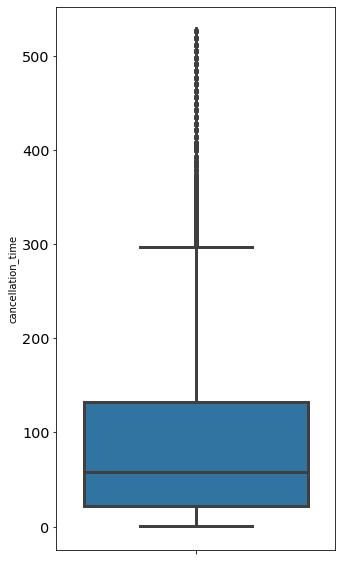

In [68]:
plt.figure(figsize = (5, 10))
sns.boxplot(y = df_clean_fe['cancellation_time'])

In [69]:
df_dep = df.groupby(['deposit_type'])[['name']].count().reset_index()
df_dep['rate'] = df_dep.name / 119390 * 100

In [70]:
df_dep

,deposit_type,name,rate
0,No Deposit,90204,75.554067
1,Non Refund,12522,10.488316
2,Refundable,48,0.040204


### Feature Selection

In [71]:
df_fs = df_fe.copy()

df_fs = df_fs[['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'total_people', 'total_stays_night',
       'last_name', 'prefix_phone_number',
       'email_type', 'was_in_waiting_list']]

### Normalization / Standarization

In [72]:
numerical = [i for i in df_fs.columns if (df_fs[i].dtypes in ['float64', 'int64']) and (i not in (['is_canceled', 'is_repeated_guest', 'was_in_waiting_list']))]

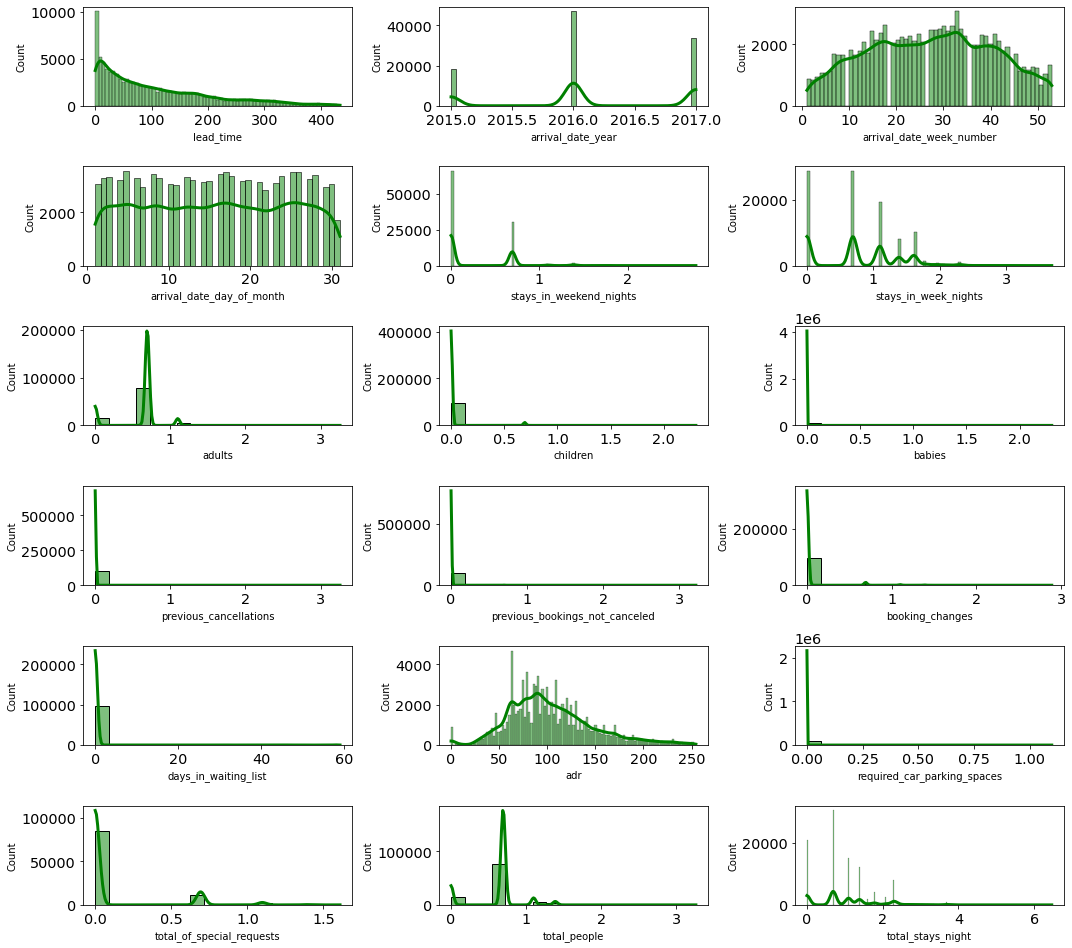

In [73]:
plt.figure(figsize = (15, 15))
for i in range(len(numerical)):
    plt.subplot(7, 3, i+1)
    sns.histplot(x = df_fs[numerical[i]], kde = True, color = 'green')
    plt.tight_layout()

In [74]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_fs['lead_time'] = MinMaxScaler().fit_transform(df_fs['lead_time'].values.reshape(len(df_fs), 1))
df_fs['required_car_parking_spaces'] = MinMaxScaler().fit_transform(df_fs['required_car_parking_spaces'].values.reshape(len(df_fs), 1))
df_fs['children'] = MinMaxScaler().fit_transform(df_fs['children'].values.reshape(len(df_fs), 1))
df_fs['adults'] = MinMaxScaler().fit_transform(df_fs['adults'].values.reshape(len(df_fs), 1))
df_fs['stays_in_weekend_nights'] = MinMaxScaler().fit_transform(df_fs['stays_in_weekend_nights'].values.reshape(len(df_fs), 1))
df_fs['stays_in_week_nights'] = MinMaxScaler().fit_transform(df_fs['stays_in_week_nights'].values.reshape(len(df_fs), 1))
df_fs['previous_cancellations'] = MinMaxScaler().fit_transform(df_fs['previous_cancellations'].values.reshape(len(df_fs), 1))
df_fs['previous_bookings_not_canceled'] = MinMaxScaler().fit_transform(df_fs['previous_bookings_not_canceled'].values.reshape(len(df_fs), 1))
df_fs['booking_changes'] = MinMaxScaler().fit_transform(df_fs['booking_changes'].values.reshape(len(df_fs), 1))
df_fs['total_of_special_requests'] = MinMaxScaler().fit_transform(df_fs['total_of_special_requests'].values.reshape(len(df_fs), 1))

### Feature Encoding

In [95]:
cats = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 
        'assigned_room_type', 'deposit_type', 'customer_type', 'email_type', 'last_name', 'prefix_phone_number', 'agent']

df_fs['arrival_date_month'] = df_fs['arrival_date_month'].astype('object')

for i in cats:
    print(f'Total unique {i}: ', len(df_fs[i].unique()))

Total unique hotel:  2
Total unique arrival_date_month:  12
Total unique meal:  5
Total unique country:  172
Total unique market_segment:  7
Total unique distribution_channel:  5
Total unique reserved_room_type:  8
Total unique assigned_room_type:  10
Total unique deposit_type:  3
Total unique customer_type:  4
Total unique email_type:  13
Total unique last_name:  1386
Total unique prefix_phone_number:  900
Total unique agent:  329


#### Using feature hasher for coloumn that have a lot if unique value

In [76]:
from sklearn.feature_extraction import FeatureHasher

var_fh = ['country', 'last_name', 'prefix_phone_number']
df_fh = df_fs.copy()

for col in var_fh: 
    if col == 'country':
        fh = FeatureHasher(n_features = 4, input_type = 'string')
        sp = fh.fit_transform(df_fh[col])
        df_transform = pd.DataFrame(sp.toarray(), columns=[str(col) + '_' + str(i) for i in range(1, 5)])
        df_fh = pd.concat([df_fh, df_transform], axis=1)
    elif (col == 'last_name') | (col == 'prefix_phone_number'):
        fh = FeatureHasher(n_features = 10, input_type = 'string')
        sp = fh.fit_transform(df_fh[col])
        df_transform = pd.DataFrame(sp.toarray(), columns=[str(col) + '_' + str(i) for i in range(1, 11)])
        df_fh = pd.concat([df_fh, df_transform], axis=1)

In [77]:
df_fh.drop(['country', 'last_name', 'prefix_phone_number'], axis = 1, inplace = True)

In [78]:
cats = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 
        'assigned_room_type', 'deposit_type', 'customer_type', 'email_type', 'agent']

df_encode = df_fh.copy()

for cat in cats:
    onehots = pd.get_dummies(df_encode[cat], prefix=cat)
    df_encode = df_encode.join(onehots)

In [79]:
df_encode.drop(columns = cats, inplace = True)

### Imbalance Dataset

In [80]:
df_encode.is_canceled.value_counts()

0    61034
1    37929
Name: is_canceled, dtype: int64

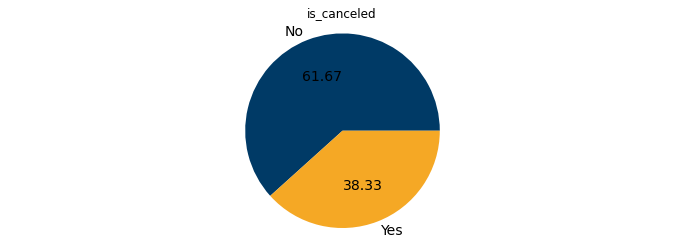

In [81]:
value_counts = df_encode["is_canceled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[0], value_counts[1]], labels=['No', 'Yes'], 
           colors=['#003A66', '#F5A825'], textprops={'color': '#000000', 'fontsize':'14'}, autopct='%.2f')
_ = ax.axis('equal')
_ = ax.set_title('is_canceled')

## Scenario 2

### Outliers

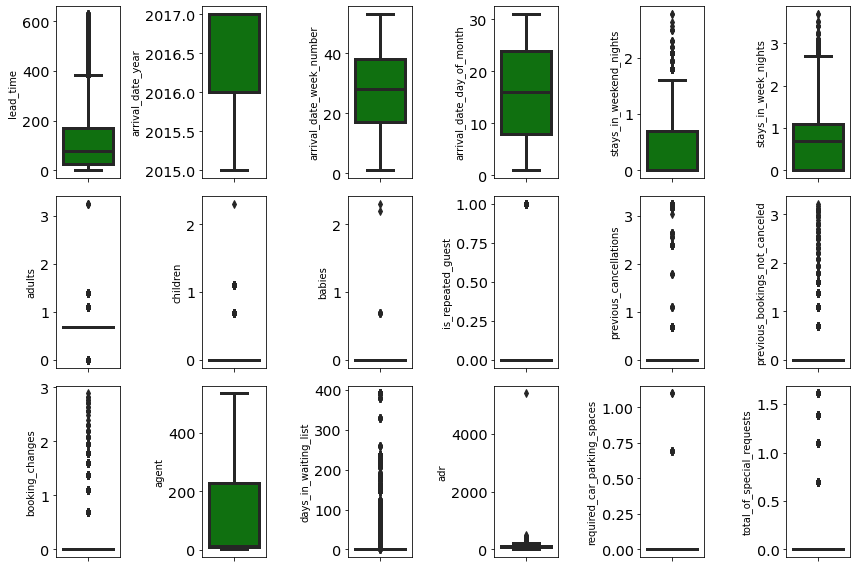

In [82]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

### Z-Score

In [96]:
df_zscore_2 = df_clean.copy()

In [97]:
from scipy import stats

print(f'total rows before filtering outlier: {len(df_zscore_2)}')

filtered_entries = np.array([True] * len(df_zscore_2))

for col in ['lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights', 'adults', 'children', 'babies',
           'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
           'adr', 'required_car_parking_spaces', 'total_of_special_requests']:
    zscore = abs(stats.zscore(df_zscore_2[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df_zscore_2 = df_zscore_2[filtered_entries]

print(f'total rows after filtering outlier: {len(df_zscore_2)}')

df_zscore_2 = df_zscore_2.reset_index(drop = True)

total rows before filtering outlier: 102775
total rows after filtering outlier: 86841


**Data after handling outlier**

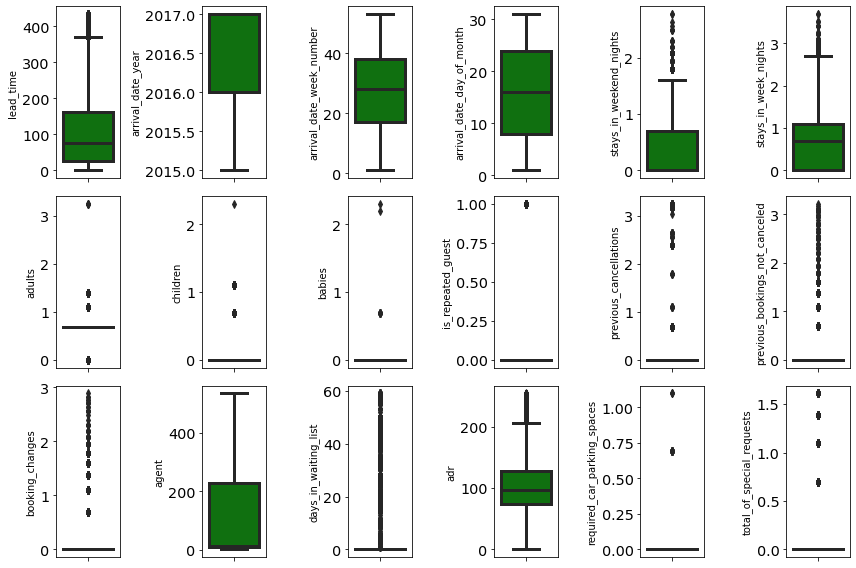

In [85]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df_zscore[nums[i]], color='green', orient='v')
    plt.tight_layout()

### Feature Engineering

In [86]:
#Data Scenario 1

df_fe_2 = df_zscore_2.copy()
df_fe_2['reservation_status_date']=df_fe_2['reservation_status_date'].astype('str')
df_fe_2 = feature_engineering(df_fe_2)

### Feature Selection

In [87]:
df_fs_2 = df_fe_2.copy()

df_fs_2 = df_fs_2[['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 
            'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 
            'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'total_of_special_requests', 'total_people', 'total_stays_night', 'last_name', 'prefix_phone_number', 
            'email_type', 'was_in_waiting_list', 'required_car_parking_spaces']]

### Feature Encoding

In [88]:
categorical = [i for i in df_fs_2.columns if df_fs_2[i].dtypes == 'O']
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'customer_type',
 'last_name',
 'prefix_phone_number',
 'email_type']

In [98]:
for i in categorical:
    print(f'Total unique {i}: ', len(df_fs[i].unique()))

Total unique hotel:  2
Total unique arrival_date_month:  12
Total unique meal:  5
Total unique country:  172
Total unique market_segment:  7
Total unique distribution_channel:  5
Total unique reserved_room_type:  8
Total unique assigned_room_type:  10
Total unique deposit_type:  3
Total unique agent:  329
Total unique customer_type:  4
Total unique last_name:  1386
Total unique prefix_phone_number:  900
Total unique email_type:  13


In [90]:
df_encode_2 = df_clean_fs.copy()

for cat in categorical:
    onehots = pd.get_dummies(df_encode_2[cat], prefix=cat)
    df_encode_2 = df_encode_2.join(onehots)

df_encode_2 = df_encode_2.drop(categorical, axis = 1)

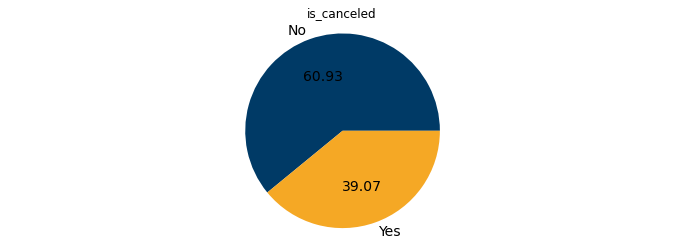

In [91]:
value_counts = df_encode_2["is_canceled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[0], value_counts[1]], labels=['No', 'Yes'], 
           colors=['#003A66', '#F5A825'], textprops={'color': '#000000', 'fontsize':'14'}, autopct='%.2f')
_ = ax.axis('equal')
_ = ax.set_title('is_canceled')

# Modelling

## Eval Function

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

## Baseline

In [183]:
from sklearn.model_selection import train_test_split

X = df_encode_bl.drop('is_canceled', axis = 1)
y = df_encode_bl['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
eval_classification(lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.78
Recall (Test Set): 0.70
F1-Score (Test Set): 0.74
AUC: 0.79


### Decision Tree

In [185]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.81
Recall (Test Set): 0.82
F1-Score (Test Set): 0.81
AUC: 0.85


#### Hyperparameter Tuning

In [186]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion = criterion,
                       splitter = splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42,  verbose = 10)
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=100, splitter=best
[CV 1/5; 1/10] END criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=100, splitter=best; total time=   0.4s
[CV 2/5; 1/10] START criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=100, splitter=best
[CV 2/5; 1/10] END criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=100, splitter=best; total time=   0.4s
[CV 3/5; 1/10] START criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=100, splitter=best
[CV 3/5; 1/10] END criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=100, splitter=best; total time=   0.4s
[CV 4/5; 1/10] START criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_

### Adaboost

In [187]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.82
Recall (Test Set): 0.71
F1-Score (Test Set): 0.76
AUC: 0.81


### Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.89
Recall (Test Set): 0.81
F1-Score (Test Set): 0.85
AUC: 0.87


#### Hyperparameter Tuning

In [189]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42,verbose=10)
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, y_pred, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1
[CV 1/5; 1/10] END bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1; total time= 1.2min
[CV 2/5; 1/10] START bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1
[CV 2/5; 1/10] END bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1; total time= 1.1min
[CV 3/5; 1/10] START bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1
[CV 3/5; 1/10] END bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samp

In [192]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


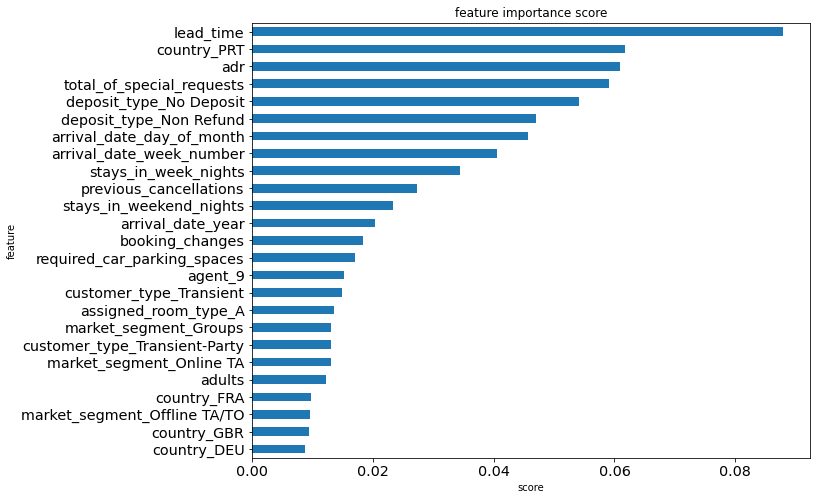

In [193]:
show_feature_importance(rf_tuned.best_estimator_)

### XGBoost

In [190]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.86
Recall (Test Set): 0.81
F1-Score (Test Set): 0.83
AUC: 0.86


## Scenario 0

Data yang digunakan adalah raw data yang hanya dilakukan data cleansing + feature engineering

In [126]:
from sklearn.model_selection import train_test_split

X = df_encode_0.drop('is_canceled', axis = 1)
y = df_encode_0['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
eval_classification(lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.74
Recall (Test Set): 0.52
F1-Score (Test Set): 0.61
AUC: 0.70


### Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.77
Recall (Test Set): 0.77
F1-Score (Test Set): 0.77
AUC: 0.81


### Adaboost

In [129]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.78
Recall (Test Set): 0.62
F1-Score (Test Set): 0.69
AUC: 0.75


### Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.86
Recall (Test Set): 0.72
F1-Score (Test Set): 0.78
AUC: 0.82


### XGBoost

In [131]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.80
Recall (Test Set): 0.79
F1-Score (Test Set): 0.79
AUC: 0.83


## Scenario 1

Data yang dilakukan cleaning, handling invalid values, duplicate data, handling outliers, feature engineering, feature selection, normalization / standarization dan feature encoding

In [132]:
from sklearn.model_selection import train_test_split

X = df_encode.drop('is_canceled', axis = 1)
y = df_encode['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
eval_classification(lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.70
Recall (Test Set): 0.46
F1-Score (Test Set): 0.55
AUC: 0.66


### Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.72
Recall (Test Set): 0.73
F1-Score (Test Set): 0.72
AUC: 0.77


### Adaboost

In [135]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.75
Recall (Test Set): 0.59
F1-Score (Test Set): 0.66
AUC: 0.73


### Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.83
Recall (Test Set): 0.69
F1-Score (Test Set): 0.75
AUC: 0.80


### XGBoost

In [137]:
for i in X_train.columns:
    if X_train[i].dtypes == 'O':
        print(i)

In [138]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.77
Recall (Test Set): 0.78
F1-Score (Test Set): 0.78
AUC: 0.81


## Scenario 2

In [139]:
from sklearn.model_selection import train_test_split

X = df_encode_2.drop('is_canceled', axis = 1)
y = df_encode_2['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
eval_classification(lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.74
Recall (Test Set): 0.52
F1-Score (Test Set): 0.61
AUC: 0.70


### Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.77
Recall (Test Set): 0.77
F1-Score (Test Set): 0.77
AUC: 0.81


### Adaboost

In [142]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.78
Recall (Test Set): 0.62
F1-Score (Test Set): 0.69
AUC: 0.75


### Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.86
Recall (Test Set): 0.72
F1-Score (Test Set): 0.78
AUC: 0.82


### XGBoost

In [144]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.80
Recall (Test Set): 0.79
F1-Score (Test Set): 0.79
AUC: 0.83
